<a href="https://colab.research.google.com/github/Yoshi-1031/Determinants-of-Human-Resource-Utilization-in-National-Public-Servants-Job-Change-Intention-Job-En/blob/main/%E5%88%86%E6%9E%90%E5%AE%9F%E8%A1%8C%E3%82%B3%E3%83%BC%E3%83%89%EF%BC%88Google_colab%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境設定（Googleコラボ）

In [37]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# 日本語フォントのマウント
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


# データ取り込み・前処理

In [39]:
import pandas as pd

# GitHubのCSVファイルURLを修正（rawデータのURLに変更）
url = "https://raw.githubusercontent.com/Yoshi-1031/test3/main/%E4%BB%A4%E5%92%8C%EF%BC%94%E5%B9%B4%E5%BA%A6%E7%99%BD%E6%9B%B8%E3%83%BB%E4%BA%BA%E4%BA%8B%E9%99%A2%E8%AA%BF%E6%9F%BB%E5%80%8B%E7%A5%A8%E3%83%87%E3%83%BC%E3%82%BF.csv"

# データを読み込む（エンコーディングを指定）
df = pd.read_csv(url, encoding='shift_jis')

# データの最初の数行を表示
df.head()


,質問項目,性別,年齢,年代,職業,職種,従業員数（民間企業）,居住地,居住地（7区分）,勤務地,...,19.あなたの職場では、業務効率化の取組みが積極的に行われている。,20.あなたの職場では、適切な人員配置が行われている。,21.あなたは、上司や人事担当者には、従業員（職員）一人一人のキャリア志向、成した成果などについて、もっと丁寧に向き合ってほしいと思う。,22.あなたは、これまでの自分自身に対する人事評価に納得している。,23.あなたの職場では、従業員（職員）を大切にする風土がある。,24.あなたの職場では、何事も気軽に相談できる雰囲気がある。,25.あなたは、現在の勤務時間や勤務場所に不都合を感じることはない（状況に合わせた柔軟な働き方ができている）。,26.あなたは、いまの職場で働くことに満足している。,27.あなたは、現在の職場を親しい友人や知人に勧めたいと思う。,28.従業員（職員）の満足度ややりがいを高める目的で、人事部門があなたの個人情報の提供を求めたり、実際に収集し分析したりすることに抵抗はない。
0,回答選択肢,1.男性 2.女性 3.無回答,NaN,1.24歳以下 2.25〜29歳 3.30〜34歳 4.35〜39歳 5.40〜44歳 6....,1.会社員 2.国家公務員（常勤）,1.事務・技術関係職種（事務系の業務や技術系の知識を要する業務 例：総務、企画、財務、営業、...,"1.50人未満 2.50人以上300人未満 3.300人以上1,000人未満 4.1,000...",1.北海道 2.青森県 3.岩手県 4.宮城県 5.秋田県 6.山形県 7.福島県 8.茨城...,1.北海道・東北 2.関東（東京都除く） 3.東京都 4.中部 5.近畿 6.中国・四国 7...,1.北海道 2.青森県 3.岩手県 4.宮城県 5.秋田県 6.山形県 7.福島県 8.茨城...,...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...,1.全くその通り 2.どちらかといえばその通り 3.どちらともいえない 4.どちらかといえば...
1,回答者1,2,24.0,1,1,1,4,1,1,1,...,2,2,2,2,2,2,1,2,1,1
2,回答者2,2,24.0,1,1,1,3,3,1,3,...,3,4,4,4,3,4,3,4,3,3
3,回答者3,2,23.0,1,1,2,3,1,1,1,...,2,3,2,2,1,2,2,2,1,1
4,回答者4,2,22.0,1,1,1,2,3,1,3,...,4,4,1,4,2,2,2,4,2,2


In [14]:
# データの整形, 列名修正, 反転処理, 従属変数作成

import pandas as pd

# 1行目を削除（分析に不要な行）
data_cleaned = df.drop(index=0)

# 不要な列（"質問項目"）を削除
data_cleaned = data_cleaned.drop(columns=[data_cleaned.columns[0]])

# 新しい列名をリストとして定義
new_column_names = [
    'Gender', 'Age', 'Age_Group', 'Occupation', 'Job_Type', 'Company_Size',
    'Residence', 'Residence_Region', 'Work_Location', 'Work_Region', 'Q11', 'Q12',
    'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
    'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34',
    'Q35', 'Q36', 'Q37', 'Q38'
]

# 新しい列名をデータに適用
data_cleaned.columns = new_column_names

# 全てのカラムの値を数値型に変換（変換できなかった値は NaN になる）
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# 反転させないカラムのリスト
exclude_columns = ['Q21', 'Q25']

# 反転させるカラムのリスト（Q11～Q38のうち、exclude_columnsに含まれないカラム）
columns_to_reverse = [col for col in new_column_names[10:] if col not in exclude_columns]

# 反転の処理（1から5の値を反転）
data_cleaned[columns_to_reverse] = data_cleaned[columns_to_reverse].apply(lambda x: 6 - x)

# 目的変数として使用するカラムのリスト
columns_for_dependent_variable = ['Q23', 'Q27', 'Q36']

# Q23, Q27, Q36 の値を合計し、平均を計算して新しいカラム "Dependent_Variable" に追加
data_cleaned['Dependent_Variable'] = data_cleaned[columns_for_dependent_variable].mean(axis=1)

# "Dependent_Variable" の値を小数第3位で四捨五入し、小数第2位までにする
data_cleaned['Dependent_Variable'] = data_cleaned['Dependent_Variable'].round(2)

data_cleaned.head()


,Gender,Age,Age_Group,Occupation,Job_Type,Company_Size,Residence,Residence_Region,Work_Location,Work_Region,...,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Dependent_Variable
1,2,24.0,1,1,1,4,1,1,1,1,...,4,4,4,4,4,5,4,5,5,4.33
2,2,24.0,1,1,1,3,3,1,3,1,...,2,2,2,3,2,3,2,3,3,2.00
3,2,23.0,1,1,2,3,1,1,1,1,...,3,4,4,5,4,4,4,5,5,4.00
4,2,22.0,1,1,1,2,3,1,3,1,...,2,5,2,4,4,4,2,4,4,2.67
5,1,24.0,1,1,4,2,7,1,7,1,...,5,4,5,5,3,4,4,5,5,4.00


In [15]:
# ダミー変数作成

!pip install xlsxwriter
import pandas as pd

# 大企業と公共部門のダミー変数を作成
data_cleaned['Company_Size_Large'] = data_cleaned['Company_Size'].apply(lambda x: 1 if x >= 4 and x != 9 else 0)
data_cleaned['Company_Size_Public_Sector'] = data_cleaned['Company_Size'].apply(lambda x: 1 if x == 9 else 0)

# 性別に関するダミー変数を作成（女性を基準にする）
data_cleaned = pd.get_dummies(data_cleaned, columns=['Gender'], drop_first=True)

# Gender のダミー変数をわかりやすく "Female" に変更
data_cleaned = data_cleaned.rename(columns={'Gender_2': 'Female'})

# 東京都かそれ以外を判別する Work_Region のダミー変数を作成
data_cleaned['Work_Region_Tokyo'] = data_cleaned['Work_Region'].apply(lambda x: 1 if x == 3 else 0)

# 'Company_Size_Large' と 'Female' の交差項を作成
data_cleaned['Company_Size_Large_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']

# 'Company_Size_Public_Sector' と 'Female' の交差項を作成
data_cleaned['Company_Size_Public_Sector_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# Q21に基づくダミー変数を作成
data_cleaned['Q21_Skill_Development'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 1 else 0)
data_cleaned['Q21_Responsibility_Role'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 2 else 0)
data_cleaned['Q21_Autonomy_WorkStyle'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 3 else 0)
data_cleaned['Q21_Economic_Stability'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 4 else 0)
data_cleaned['Q21_Creative_Innovation'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 5 else 0)
data_cleaned['Q21_Social_Contribution'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 6 else 0)
data_cleaned['Q21_Challenge_ProblemSolving'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 7 else 0)
data_cleaned['Q21_Work_Life_Balance'] = data_cleaned['Q21'].apply(lambda x: 1 if x == 8 else 0)

# Q25で一または二の値を取る場合に1、それ以外の場合に0を取るダミー変数を作成
data_cleaned['Mission_Vision_Value_Alignment'] = data_cleaned['Q25'].apply(lambda x: 1 if x in [1, 2] else 0)

# Q25で六または七の値を取る場合に1、それ以外の場合に0を取る「ミッションビジョンバリューの不存在」というダミー変数を作成
data_cleaned['Mission_Vision_Value_Absent'] = data_cleaned['Q25'].apply(lambda x: 1 if x in [6, 7] else 0)

# ブール値のカラムを数値（0/1）に変換（'Dependent_Variable' を除外）
columns_to_convert = data_cleaned.columns.difference(['Dependent_Variable', "Q25"])
data_cleaned[columns_to_convert] = data_cleaned[columns_to_convert].astype(int)

# Excel形式でデータフレームを出力するコード（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'  # 保存するファイル名

# データフレームをExcel形式で出力
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    data_cleaned.to_excel(writer, index=False, sheet_name='Cleaned_Data')
    worksheet = writer.sheets['Cleaned_Data']

    # 列幅を調整
    for column in data_cleaned:
        max_len = max(data_cleaned[column].astype(str).map(len).max(), len(column)) + 2
        col_idx = data_cleaned.columns.get_loc(column)
        worksheet.set_column(col_idx, col_idx, max_len)

print(f'DataFrame has been saved to {file_path}')


DataFrame has been saved to /content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx


# 記述統計

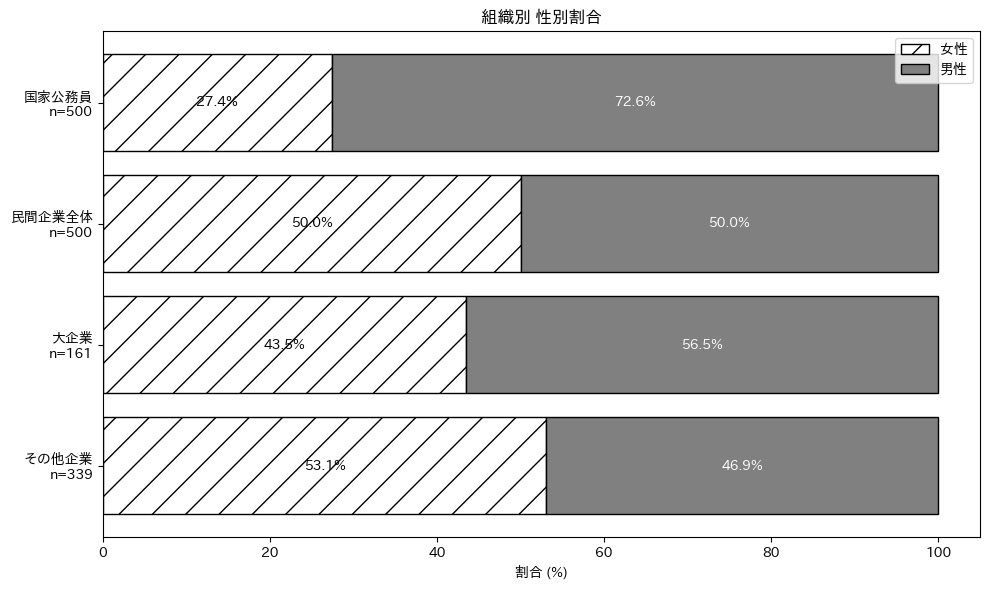

In [16]:
# グラフ描画（記述統計_①性別）

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_gender_proportions_horizontal(data):
    # 各グループの条件と表示ラベル（上からの順番）
    conditions = [
        data['Company_Size_Public_Sector'] == 1,
        data['Company_Size_Public_Sector'] == 0,
        (data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 1),
        (data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 0)
    ]
    labels = ['国家公務員', '民間企業全体', '大企業', 'その他企業']

    # 各グループごとに女性割合、男性割合、サンプルサイズを算出
    ratios = []
    for cond in conditions:
        g = data[cond]
        if len(g) > 0:
            f = g['Female'].mean(skipna=True) * 100
            m = 100 - f
        else:
            f, m = np.nan, np.nan  # サンプルサイズが0なら NaN を入れる
        ratios.append((f, m, len(g)))

    female_ratios, male_ratios, sample_sizes = zip(*ratios)

    # サンプルサイズを含むラベルを作成し、Y軸用の座標を定義
    y = range(len(labels))
    labeled_labels = [f"{l}\nn={n}" for l, n in zip(labels, sample_sizes)]

    # グラフ作成
    plt.figure(figsize=(10, 6))
    bars_female = plt.barh(y, female_ratios, color='white', edgecolor='black', hatch='/', label='女性')
    bars_male = plt.barh(y, male_ratios, left=female_ratios, color='gray', edgecolor='black', label='男性')

    for i, (f, m) in enumerate(zip(female_ratios, male_ratios)):
        if not np.isnan(f):
            plt.text(f/2, i, f"{f:.1f}%", va='center', ha='center', color='black', fontweight='bold')
        if not np.isnan(m) and m > 0:
            plt.text(f + m/2, i, f"{m:.1f}%", va='center', ha='center', color='white', fontweight='bold')

    plt.yticks(y, labeled_labels)
    plt.xlabel('割合 (%)')
    plt.title('組織別 性別割合')

    # 白黒対応の凡例を作成（Patch を使用）
    legend_female = mpatches.Patch(facecolor='white', edgecolor='black', hatch='/', label='女性')
    legend_male = mpatches.Patch(facecolor='gray', edgecolor='black', label='男性')

    plt.legend(handles=[legend_female, legend_male], loc='upper right')

    plt.gca().invert_yaxis()  # 上から指定の順番に表示
    plt.tight_layout()
    plt.show()

# プロット実行（グラフの保存は行いません）
plot_gender_proportions_horizontal(data_cleaned)


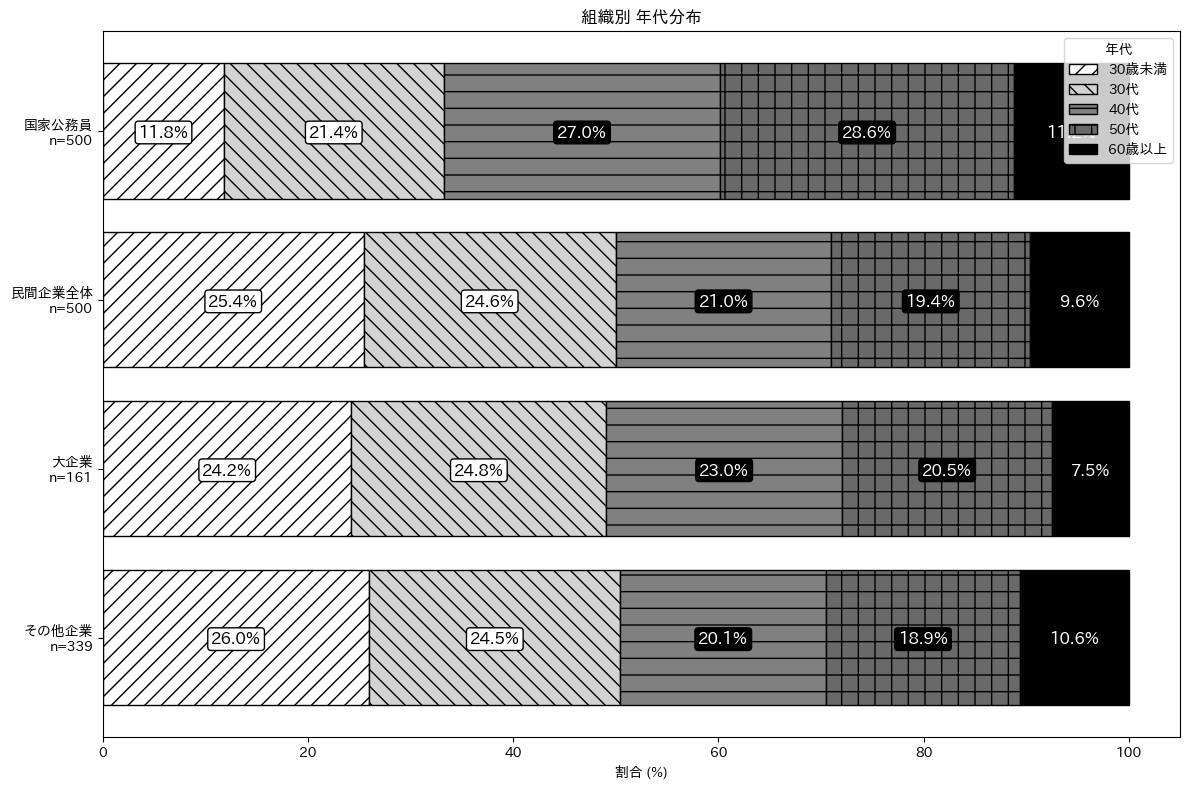

In [18]:
# グラフ描画（記述統計_②年代）

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def plot_age_distribution_by_org(data):
    # グループの定義
    groups = {
        '国家公務員': data[data['Company_Size_Public_Sector'] == 1],
        '民間企業全体': data[data['Company_Size_Public_Sector'] == 0],
        '大企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 1)],
        'その他企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 0)]
    }
    ordered = list(groups.keys())

    # 年代カテゴリとグレースケールの設定
    age_bins = ['30歳未満', '30代', '40代', '50代', '60歳以上']
    grayscale = ['white', 'lightgray', 'gray', 'dimgray', 'black']
    hatches = ['//', '\\\\', '-', '+', 'o']  # ハッチングの種類

    # 年代分類関数
    cat_age = lambda a: '30歳未満' if a < 30 else '30代' if a < 40 else '40代' if a < 50 else '50代' if a < 60 else '60歳以上'

    # 各グループごとに年代分布とサンプルサイズを計算
    sample_sizes, dist = {}, {}
    for name in ordered:
        df = groups[name].copy()
        df['Age_Bin'] = df['Age'].apply(cat_age)
        total = len(df)
        sample_sizes[name] = total
        dist[name] = {bin: (df[df['Age_Bin'] == bin].shape[0] / total * 100 if total else 0) for bin in age_bins}

    # 各年代ごとの割合リストとY軸ラベル作成
    bin_ratios = {bin: [dist[name][bin] for name in ordered] for bin in age_bins}
    labels = [f"{n}\nn={sample_sizes[n]}" for n in ordered]

    # 積み上げ横棒グラフの描画
    y = range(len(ordered))
    plt.figure(figsize=(12, 8))
    bottoms = [0] * len(ordered)
    bars = []

    for i, bin in enumerate(age_bins):
        b = plt.barh(y, bin_ratios[bin], left=bottoms, color=grayscale[i], edgecolor='black', hatch=hatches[i], label=bin, linewidth=1)
        bars.append(b)
        bottoms = [b_val + r for b_val, r in zip(bottoms, bin_ratios[bin])]

    # 棒内に割合を表示（5%以上のみ表示）
    for i, bin in enumerate(age_bins):
        for j, rect in enumerate(bars[i]):
            if rect.get_width() > 5:
                text_color = 'black' if grayscale[i] in ['white', 'lightgray'] else 'white'
                bbox_props = dict(facecolor='black' if text_color == 'white' else 'white',
                                  edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0)  # 透明度なし

                plt.text(rect.get_x() + rect.get_width()/2,
                         rect.get_y() + rect.get_height()/2,
                         f"{bin_ratios[bin][j]:.1f}%", ha='center', va='center_baseline',
                         fontsize=12, color=text_color, fontweight='bold', bbox=bbox_props)

    plt.yticks(y, labels)
    plt.xlabel('割合 (%)')
    plt.title('組織別 年代分布')

    # 白黒対応の凡例を作成
    legend_patches = [mpatches.Patch(facecolor=grayscale[i], edgecolor='black', hatch=hatches[i], label=age_bins[i]) for i in range(len(age_bins))]
    plt.legend(handles=legend_patches, title='年代', loc='upper right')

    plt.gca().invert_yaxis()  # 上から順に表示
    plt.tight_layout()
    plt.show()

# プロット実行（ファイル保存は行いません）
plot_age_distribution_by_org(data_cleaned)


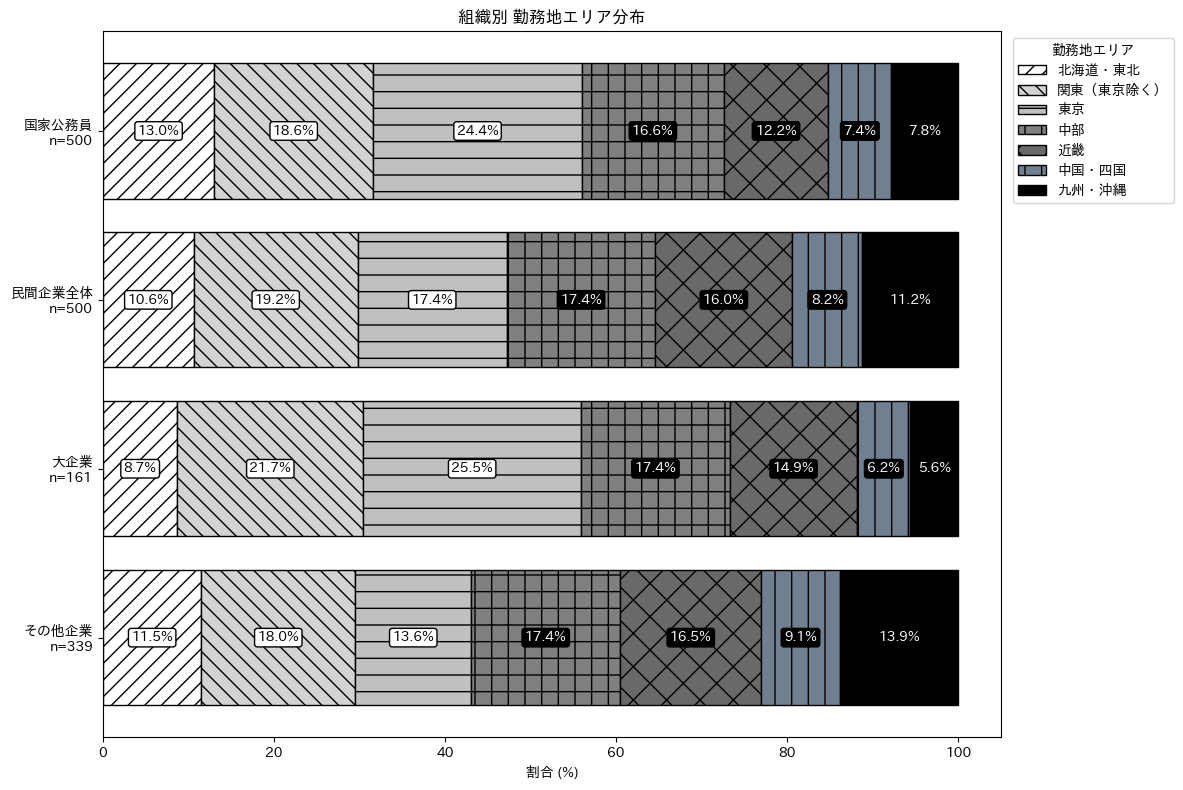

In [19]:
# グラフ描画（記述統計_③地域）

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_work_location_distribution_by_org(data):
    # 組織グループの定義（上から「国家公務員」「民間企業全体」「大企業」「その他企業」）
    groups = {
        '国家公務員': data[data['Company_Size_Public_Sector'] == 1],
        '民間企業全体': data[data['Company_Size_Public_Sector'] == 0],
        '大企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 1)],
        'その他企業': data[(data['Company_Size_Public_Sector'] == 0) & (data['Company_Size_Large'] == 0)]
    }
    ordered = list(groups.keys())

    # 勤務地エリアの日本語名と識別用番号
    loc_names = {1: '北海道・東北', 2: '関東（東京除く）', 3: '東京', 4: '中部', 5: '近畿', 6: '中国・四国', 7: '九州・沖縄'}
    work_regions = sorted(loc_names)

    # グレースケールでの色（左から薄い順に）とハッチングパターン（7カテゴリ分）
    grayscale = ['white', 'lightgray', 'silver', 'gray', 'dimgray', 'slategray', 'black']
    hatches    = ['//', '\\\\', '-', '+', 'x', '|', 'o']

    # 各グループごとのサンプルサイズと各エリアの割合（％）を計算
    sample_sizes, dist = {}, {}
    for org in ordered:
        df = groups[org]
        total = len(df)
        sample_sizes[org] = total
        dist[org] = {r: (df['Work_Region'].eq(r).sum() / total * 100 if total else 0) for r in work_regions}
    # 各勤務地（work region）ごとに、各グループの割合リストを作成
    bin_ratios = {r: [dist[org][r] for org in ordered] for r in work_regions}
    labels = [f"{org}\nn={sample_sizes[org]}" for org in ordered]
    y = range(len(ordered))

    plt.figure(figsize=(12,8))
    bottoms = [0] * len(ordered)
    bars = []

    # 各勤務地ごとに、積み上げ横棒グラフとして描画
    for i, r in enumerate(work_regions):
        b = plt.barh(y, bin_ratios[r], left=bottoms, color=grayscale[i],
                     edgecolor='black', hatch=hatches[i], label=loc_names[r], linewidth=1)
        bars.append(b)
        bottoms = [bv + rv for bv, rv in zip(bottoms, bin_ratios[r])]

    # 棒の幅が十分な部分に、割合を表示
    # テキストの背景は不透明な白または黒で、バーの色に合わせて文字色を変更
    for i, r in enumerate(work_regions):
        for j, rect in enumerate(bars[i]):
            if rect.get_width() > 5:
                # 薄い色（white, lightgray, silver）なら黒文字、濃い色なら白文字
                text_color = 'black' if grayscale[i] in ['white', 'lightgray', 'silver'] else 'white'
                # 背景ボックスはバーと対比するため、薄い文字なら白背景、濃い文字なら黒背景（透明度はなし）
                bbox_props = dict(facecolor='white' if text_color=='black' else 'black',
                                  edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0)
                plt.text(rect.get_x() + rect.get_width()/2,
                         rect.get_y() + rect.get_height()/2,
                         f"{bin_ratios[r][j]:.1f}%", ha='center', va='center',
                         fontsize=10, color=text_color, fontweight='bold', bbox=bbox_props)

    plt.yticks(y, labels)
    plt.xlabel('割合 (%)')
    plt.title('組織別 勤務地エリア分布')

    # 白黒対応の凡例を作成（mpatches.Patch でハッチング・グレースケールを反映）
    legend_patches = [mpatches.Patch(facecolor=grayscale[i], edgecolor='black',
                                     hatch=hatches[i], label=loc_names[r]) for i, r in enumerate(work_regions)]
    plt.legend(handles=legend_patches, title='勤務地エリア', loc='upper right', bbox_to_anchor=(1.2, 1))

    plt.gca().invert_yaxis()  # 上から順に表示
    plt.tight_layout()
    plt.show()

# グラフをプロット（ファイル保存は行いません）
plot_work_location_distribution_by_org(data_cleaned)


# 従属変数の分布

In [20]:
# 図１　従属変数の分布

# 必要なライブラリのインポート
!apt-get -y install fonts-ipafont-gothic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from matplotlib import font_manager

# IPAexGothic フォント設定
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14  # フォントサイズを少し大きく調整

# データピボットとプロット生成関数
def create_heatmap(data, index, columns, title, xlabel, ylabel, cmap, ax):
    pivot_table = data.pivot_table(index=index, columns=columns, aggfunc='size', fill_value=0).iloc[::-1]
    sns.heatmap(pivot_table, ax=ax, cmap=cmap, annot=True, fmt="d", cbar=False, annot_kws={"size": 12})
    ax.set_title(title, fontproperties=font_prop, fontsize=16, pad=10, loc='center')
    ax.set_xlabel("")  # X軸ラベルを削除
    ax.set_ylabel(ylabel, fontproperties=font_prop, fontsize=14)


def create_histogram(data, column, title, xlabel, ax, color, bins=5, max_y=None):
    data[column].plot(kind='hist', bins=bins, ax=ax, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title, fontproperties=font_prop, fontsize=16, pad=10, loc='center')
    ax.set_xlabel("")  # X軸ラベルを削除
    ax.set_ylabel("度数", fontproperties=font_prop, fontsize=14)  # Y軸ラベルを"度数"に変更
    ax.set_xticks(range(1, 6))
    ax.xaxis.set_tick_params(labelbottom=True, labeltop=False)  # X軸ラベルを下のみに設定
    if max_y:
        ax.set_ylim(0, max_y)

# Excelファイルへの出力設定（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms.xlsx'
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # ヒートマップの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    heatmap_params = [
        ('Q23', 'Q27', "Q23_転職意向 vs Q27_熱中度", "Q27_熱中度", "Q23_転職意向", "Blues", axes[0]),
        ('Q23', 'Q36', "Q23_転職意向 vs Q36_満足度", "Q36_満足度", "Q23_転職意向", "Oranges", axes[1]),
        ('Q36', 'Q27', "Q36_満足度 vs Q27_熱中度", "Q27_熱中度", "Q36_満足度", "Greens", axes[2])
    ]
    for params in heatmap_params:
        create_heatmap(data_cleaned, *params)
    plt.tight_layout(pad=2)
    image_stream_heatmap = io.BytesIO()
    plt.savefig(image_stream_heatmap, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Heatmaps')
    writer.sheets['Heatmaps'] = worksheet
    worksheet.insert_image('B2', 'heatmap_charts', {'image_data': image_stream_heatmap, 'x_scale': 0.5, 'y_scale': 0.5})

    # ヒストグラムの生成
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    max_y = max(data_cleaned['Q23'].value_counts().max(),
                data_cleaned['Q27'].value_counts().max(),
                data_cleaned['Q36'].value_counts().max())
    histogram_params = [
        ('Q23', "Q23_転職意向", "Q23_転職意向", axes[0], 'blue'),
        ('Q27', "Q27_熱中度", "Q27_熱中度", axes[1], 'orange'),
        ('Q36', "Q36_満足度", "Q36_満足度", axes[2], 'green')
    ]
    for params in histogram_params:
        create_histogram(data_cleaned, *params, bins=5, max_y=max_y)
    plt.tight_layout(pad=2)
    image_stream_histogram = io.BytesIO()
    plt.savefig(image_stream_histogram, format='png', dpi=300)
    plt.close(fig)
    worksheet = writer.book.add_worksheet('Histograms')
    writer.sheets['Histograms'] = worksheet
    worksheet.insert_image('B2', 'histogram_charts', {'image_data': image_stream_histogram, 'x_scale': 0.5, 'y_scale': 0.5})

print(f"ヒートマップとヒストグラムを含むExcelファイルを保存しました: {output_file_path}")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


ヒートマップとヒストグラムを含むExcelファイルを保存しました: /content/drive/MyDrive/■研究/ファイル出力先/Heatmap_and_Histograms.xlsx


# 因子分析

In [41]:
# データの因子分析への適合性の確認

import pandas as pd
from scipy import stats
from google.colab import drive
!pip install factor_analyzer openpyxl
from factor_analyzer import calculate_kmo

# データの読み込み（■！読込先フォルダを実行者各自で設定すること！）
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'
data_cleaned = pd.read_excel(file_path)

# 質問項目 (Q11 ~ Q38) の抽出（因子分析対象のデータを準備する）
# 以下の項目は因子分析の対象外として除外しています：
# - Q21: 働くうえで最も重要なことを選択する項目であり、分析には適さないため
# - Q23, Q27, Q36: 従属変数として使用する予定のため
columns_for_fa = [col for col in data_cleaned.columns if col.startswith('Q') and col not in ['Dependent_Variable', 'Q21', 'Q23', 'Q27', 'Q36']]
data_for_fa = data_cleaned[columns_for_fa].dropna()

# バートレットの球体性検定（因子分析が適切かを確認するための検定）
chi_square_value, p_value = stats.bartlett(*[data_for_fa[col] for col in data_for_fa.columns])
bartlett_results = {'検定': ['バートレットの球体性検定'], 'χ²': [chi_square_value], 'p値': [p_value]}

# KMO 検定の計算（factor_analyzer ライブラリを使用）
kmo_all, kmo_model = calculate_kmo(data_for_fa)
kmo_results = {'検定': ['KMO 検定'], 'KMO 全体の値': [kmo_model]}

# 結果をデータフレームにまとめる
bartlett_df = pd.DataFrame(bartlett_results)
kmo_df = pd.DataFrame(kmo_results)
kmo_all_df = pd.DataFrame({'各変数の KMO 値': kmo_all}, index=columns_for_fa)

# エクセルファイルに出力（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_tests_results.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    bartlett_df.to_excel(writer, sheet_name='バートレット検定結果', index=False)
    kmo_df.to_excel(writer, sheet_name='KMO 検定結果', index=False)
    kmo_all_df.to_excel(writer, sheet_name='各変数の KMO 値')

print(f"検定結果がエクセルファイルとして保存されました: {output_file_path}")


検定結果がエクセルファイルとして保存されました: /content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_tests_results.xlsx


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [42]:
# 因子分析の実行、因子負荷量の確認

!pip install factor_analyzer openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from google.colab import drive
import openpyxl
from openpyxl.drawing.image import Image
from io import BytesIO

# データの読み込み（■！読込先フォルダを実行者各自で設定すること！）
file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cleaned_data.xlsx'
data_cleaned = pd.read_excel(file_path)

# 除外される項目のリスト（昇順に並べたもの）
excluded_columns = sorted(['Q13', 'Q15', 'Q16', 'Q21', 'Q23', 'Q24', 'Q27', 'Q36', 'Q37', 'Q38'])

# 個人の信念に関する質問項目（昇順）
personal_belief_columns = sorted(['Q14', 'Q17', 'Q18', 'Q20', 'Q22'])

# 組織の状態に関する質問項目（昇順）
organizational_state_columns = sorted(['Q11', 'Q12', 'Q19', 'Q25', 'Q26', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35'])

# データを除外項目を考慮して抽出
data_personal_belief = data_cleaned[personal_belief_columns].dropna()
data_organizational_state = data_cleaned[organizational_state_columns].dropna()

# 因子分析の実行（個人の信念: 因子数を1に設定）
fa_personal_belief = FactorAnalyzer(n_factors=1, rotation='promax')
fa_personal_belief.fit(data_personal_belief)
factor_loadings_personal = pd.DataFrame(fa_personal_belief.loadings_, index=data_personal_belief.columns)

# 因子分析の実行（組織の状態: 因子数を2に設定）
fa_organizational_state = FactorAnalyzer(n_factors=2, rotation='promax')
fa_organizational_state.fit(data_organizational_state)
factor_loadings_organizational = pd.DataFrame(fa_organizational_state.loadings_, index=data_organizational_state.columns)

# 因子負荷量をヒートマップとして可視化（個人の信念）
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings_personal, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Factor Loadings Heatmap (Personal Beliefs)')
plt.tight_layout()

# ヒートマップをメモリ上に保存（個人の信念）
image_stream_personal = BytesIO()
plt.savefig(image_stream_personal, format='png')
plt.close()
image_stream_personal.seek(0)

# 因子負荷量をヒートマップとして可視化（組織の状態）
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings_organizational, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Factor Loadings Heatmap (Organizational State)')
plt.tight_layout()

# ヒートマップをメモリ上に保存（組織の状態）
image_stream_organizational = BytesIO()
plt.savefig(image_stream_organizational, format='png')
plt.close()
image_stream_organizational.seek(0)

# エクセルファイルに因子負荷量とヒートマップを同じシートに保存（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_loadings_promax.xlsx'
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    # 因子負荷量を保存（個人の信念）
    factor_loadings_personal.to_excel(writer, sheet_name='個人の信念', index=True)
    workbook = writer.book
    worksheet_personal = writer.sheets['個人の信念']

    # 画像を同じシートに挿入（個人の信念）
    img_personal = Image(image_stream_personal)
    worksheet_personal.add_image(img_personal, 'F1')

    # 因子負荷量を保存（組織の状態）
    factor_loadings_organizational.to_excel(writer, sheet_name='組織の状態', index=True)
    worksheet_organizational = writer.sheets['組織の状態']

    # 画像を同じシートに挿入（組織の状態）
    img_organizational = Image(image_stream_organizational)
    worksheet_organizational.add_image(img_organizational, 'F1')

print(f"因子負荷量とヒートマップがエクセルファイルに保存されました: {output_file_path}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


因子負荷量とヒートマップがエクセルファイルに保存されました: /content/drive/MyDrive/■研究/ファイル出力先/factor_analysis_loadings_promax.xlsx


In [23]:
# 因子分析の妥当性検証（クロンバックのアルファ計算）

!pip install openpyxl
!pip install pingouin
import pingouin as pg
import pandas as pd

# ①Q11, Q12
subset_1 = data_cleaned[['Q11', 'Q12']]
alpha_1 = pg.cronbach_alpha(subset_1)[0]

# ②Q29, Q30
subset_2 = data_cleaned[['Q29', 'Q30']]
alpha_2 = pg.cronbach_alpha(subset_2)[0]

# ③Q33, Q34
subset_3 = data_cleaned[['Q33', 'Q34']]
alpha_3 = pg.cronbach_alpha(subset_3)[0]

# ④Q14, Q17, Q18
subset_4 = data_cleaned[['Q14', 'Q17', 'Q18']]
alpha_4 = pg.cronbach_alpha(subset_4)[0]

# 因子名とクロンバックのアルファの結果を辞書にまとめる
alpha_results = {
    'Factor Name': [
        '職場による役割やスキルの重視',
        '職場による業務・必要人員の整理',
        '職場での風通しの良さ',
        '個人の持つキャリア形成・スキルアップへの関心'
    ],
    'Items': [
        'Q11, Q12',
        'Q29, Q30',
        'Q33, Q34',
        'Q14, Q17, Q18'
    ],
    'Cronbach\'s Alpha': [alpha_1, alpha_2, alpha_3, alpha_4]
}

# 結果をDataFrameに変換
alpha_df = pd.DataFrame(alpha_results)

# Excelファイルに保存（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/cronbach_alpha_with_factor_names.xlsx'
alpha_df.to_excel(output_file_path, index=False)

# 列の幅を調整するためにopenpyxlを使って調整
from openpyxl import load_workbook

# Excelファイルを開く
wb = load_workbook(output_file_path)
ws = wb.active

# 各列の幅を自動調整
for column in ws.columns:
    max_length = 0
    column = list(column)
    for cell in column:
        try:
            max_length = max(max_length, len(str(cell.value)))
        except:
            pass
    adjusted_width = (max_length + 2)  # +2は余裕を持たせるため
    ws.column_dimensions[column[0].column_letter].width = adjusted_width

# 調整後のファイルを保存
wb.save(output_file_path)

print(f"クロンバックのアルファ結果と因子名がExcelファイルに保存されました（列幅調整済み）: {output_file_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.6 MB/s eta 0:00:00
クロンバックのアルファ結果と因子名がExcelファイルに保存されました（列幅調整済み）: /content/drive/MyDrive/■研究/ファイル出力先/cronbach_alpha_with_factor_names.xlsx


# 重回帰

In [43]:
# 表２、３、４（重回帰分析：独立変数を入れ替えながら基本モデルに一つずつ投入する場合）

import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子分析で得た因子をデータに追加
data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# 交差項を作成
data_cleaned['Factor_Development_x_Importance'] = (
    data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
)

# Q21のダミー変数リストを作成
q21_dummy_vars = ['Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
                  'Q21_Creative_Innovation', 'Q21_Social_Contribution',
                  'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance']

# 基本的な独立変数（属性）
base_independent_vars = ['Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
                         'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
                         'Q20', 'Q22', 'Factor_Career_Development'] + q21_dummy_vars

# 計算するモデルの順序リスト
model_items = [
    ('Basic_Model', "基本モデル", base_independent_vars),  # 基本モデルを追加
    ('Q19', "質問項目 Q19"),
    ('Q26', "質問項目 Q26"),
    ('Q35', "質問項目 Q35"),
    ('Mission_Vision_Value_Alignment', "ミッションビジョンバリューの共感"),
    ('Mission_Vision_Value_Absent', "ミッションビジョンバリューの不存在"),
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent']),
    ('Factor_Work_Atmosphere', "因子: 職場の雰囲気"),
    ('Factor_Work_Staff_Organization', "因子: 職場の組織環境"),
    ('Factor_Role_Importance', "因子: ロールの重要性"),
]

# 定数項を追加し回帰分析を実行する関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)  # 定数項を追加
    model = sm.OLS(y, X).fit()

    # 回帰結果を直接DataFrameとして保存
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],  # DataFrameを直接保存
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs  # 観測数を保存
    }

    # VIF計算
    vif_data = calculate_vif(X)
    vif_results[model_name] = vif_data

    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(vif_data)

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]  # 切片は除外

# 従属変数の設定
dependent_variables = {
    'Q23': 'あなた自身は、今後、転職することを考えていますか。',
    'Q27': 'あなたは、いまの職場の仕事に熱中することができている。',
    'Q36': 'あなたは、いまの職場で働くことに満足している。',
}

# 回帰結果を保存するリスト
regression_results = {}
vif_results = {}

# 回帰分析の実行
for dep_var, description in dependent_variables.items():
    print(f"\n回帰分析の結果 (従属変数: {dep_var}) - {description}")
    y = data_cleaned[dep_var]

    for item in model_items:
        if len(item) == 3:  # 特定の複数変数を同時に含むモデル
            variables = item[2]  # モデルに指定された変数リスト
        else:  # 単一変数モデル
            variables = base_independent_vars + [item[0]]

        run_regression(
            X=data_cleaned[variables],
            y=y,
            description=item[1],
            model_name=f"{dep_var}_{item[0]}"
        )



回帰分析の結果 (従属変数: Q23) - あなた自身は、今後、転職することを考えていますか。

基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           7.54e-54
Time:                        09:42:11   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [26]:
#　表５（重回帰分析：交差項による層別分析）

import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子の追加
factors = {
    'Factor_Work_Atmosphere': ['Q33', 'Q34'],
    'Factor_Career_Development': ['Q14', 'Q17', 'Q18'],
    'Factor_Role_Importance': ['Q11', 'Q12'],
    'Factor_Work_Staff_Organization': ['Q29', 'Q30']
}

for factor, cols in factors.items():
    data_cleaned[factor] = data_cleaned[cols].mean(axis=1)

# 必要な交差項のみ生成する関数
def generate_selected_interactions(data, base_var, interaction_vars):
    selected_interactions = []
    for iv in interaction_vars:
        interaction_name = f"{base_var}_x_{iv}"
        data[interaction_name] = data[base_var] * data[iv]
        selected_interactions.append(interaction_name)
    return selected_interactions

# 基本モデル用の交差項（固定で含める）
data_cleaned['Company_Size_Large_x_Female'] = data_cleaned['Company_Size_Large'] * data_cleaned['Female']
data_cleaned['Company_Size_Public_Sector_x_Female'] = data_cleaned['Company_Size_Public_Sector'] * data_cleaned['Female']

# 交差項対象変数
target_vars = ['Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance', 'Q19', 'Q26', 'Q35',
               'Mission_Vision_Value_Alignment']

# 対象変数ごとに交差項を生成
interaction_vars = ['Company_Size_Public_Sector', 'Company_Size_Large', 'Female']
interaction_terms = {}

for var in target_vars:
    interaction_terms[var] = generate_selected_interactions(data_cleaned, var, interaction_vars)

# 基本独立変数
q21_dummy_vars = [f'Q21_{name}' for name in ['Skill_Development', 'Responsibility_Role', 'Autonomy_WorkStyle',
                                            'Creative_Innovation', 'Social_Contribution',
                                            'Challenge_ProblemSolving', 'Work_Life_Balance']]
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Q20', 'Q22', 'Factor_Career_Development',
    'Company_Size_Large_x_Female', 'Company_Size_Public_Sector_x_Female'
] + q21_dummy_vars

# ミッションビジョンバリュー関連モデル（Alignmentは交差項を作成、Absentは単独）
mission_combined_terms = interaction_terms['Mission_Vision_Value_Alignment']
model_items = [('Basic_Model', "基本モデル", base_independent_vars)]
model_items += [(var, f"質問項目 {var}", base_independent_vars + [var] + interaction_terms[var])
                for var in target_vars if var != 'Mission_Vision_Value_Alignment']
model_items.append(
    ('Mission_Vision_Alignment_and_Absent', "ミッションビジョンバリューの共感と不存在",
     base_independent_vars + ['Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent'] +
     mission_combined_terms)
)

# 回帰分析関数
def run_regression(X, y, description, model_name):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n{description} (モデル名: {model_name}):")
    print(model.summary())
    print("\nVIF:")
    print(calculate_vif(X))
    regression_results[model_name] = {
        'description': description,
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs
    }

# VIF計算関数
def calculate_vif(X):
    return pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    }).query("Variable != 'const'")

# 従属変数と回帰実行
dependent_variables = {'Q23': '転職意向', 'Q27': '熱中度', 'Q36': '満足度'}
regression_results = {}

for dep_var, description in dependent_variables.items():
    for name, desc, variables in model_items:
        run_regression(data_cleaned[variables], data_cleaned[dep_var], desc, f"{dep_var}_{name}")



基本モデル (モデル名: Q23_Basic_Model):
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.53
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           7.54e-54
Time:                        09:24:42   Log-Likelihood:                -1486.8
No. Observations:                1000   AIC:                             3010.
Df Residuals:                     982   BIC:                             3098.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [29]:
#　付録５（重回帰分析：独立変数を全て同時にモデルに投入する場合）

import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 因子分析で得た因子をデータに追加
data_cleaned['Factor_Work_Atmosphere'] = data_cleaned[['Q33', 'Q34']].mean(axis=1)
data_cleaned['Factor_Career_Development'] = data_cleaned[['Q14', 'Q17', 'Q18']].mean(axis=1)
data_cleaned['Factor_Role_Importance'] = data_cleaned[['Q11', 'Q12']].mean(axis=1)
data_cleaned['Factor_Work_Staff_Organization'] = data_cleaned[['Q29', 'Q30']].mean(axis=1)

# 交差項を作成
data_cleaned['Factor_Development_x_Importance'] = (
    data_cleaned['Factor_Career_Development'] * data_cleaned['Factor_Role_Importance']
)

# Q21のダミー変数リスト
q21_dummy_vars = [
    'Q21_Skill_Development', 'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle',
    'Q21_Creative_Innovation', 'Q21_Social_Contribution',
    'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance'
]

# 基本モデルの独立変数
base_independent_vars = [
    'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
    'Q20', 'Q22', 'Factor_Career_Development'
]

# モデル順序リストに含まれる変数
additional_vars = [
    'Q19', 'Q26', 'Q35', 'Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent',
    'Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance'
]

# Q21のダミー変数を指定の位置に挿入
all_independent_vars = (
    base_independent_vars[:-1]  # Factor_Career_Developmentまでの変数
    + q21_dummy_vars            # Q21のダミー変数
    + base_independent_vars[-1:]  # Factor_Career_Developmentを保持
    + additional_vars           # その他の追加変数
)

# 回帰分析を実行する関数
def run_full_model(X, y, dep_var):
    X = sm.add_constant(X)  # 定数項を追加
    model = sm.OLS(y, X).fit()

    # 結果を出力
    print(f"\n回帰分析の結果 (従属変数: {dep_var})")
    print(model.summary())

    # VIF計算
    vif_data = calculate_vif(X)
    print("\nVIF:")
    print(vif_data)

    return model, vif_data

# VIFを計算する関数
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["Variable"] != "const"]  # 定数項を除外

# 従属変数の設定
dependent_variables = {
    'Q23': '転職意向',
    'Q27': '仕事への熱中度',
    'Q36': '職場への満足度',
}

# 全ての独立変数を投入した1つのモデルを計算
regression_results = {}
vif_results = {}

for dep_var, description in dependent_variables.items():
    print(f"\n回帰分析の実行中 (従属変数: {dep_var}) - {description}")
    y = data_cleaned[dep_var]
    X = data_cleaned[all_independent_vars]

    # 回帰モデルを実行
    model, vif_data = run_full_model(X, y, dep_var)

    # 結果を保存
    regression_results[dep_var] = {
        'summary_df': model.summary2().tables[1],
        'r_squared': model.rsquared,
        'f_statistic': model.fvalue,
        'f_pvalue': model.f_pvalue,
        'nobs': model.nobs,
    }
    vif_results[dep_var] = vif_data



回帰分析の実行中 (従属変数: Q23) - 転職意向

回帰分析の結果 (従属変数: Q23)
                            OLS Regression Results                            
Dep. Variable:                    Q23   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     16.64
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           4.01e-59
Time:                        09:29:12   Log-Likelihood:                -1461.0
No. Observations:                1000   AIC:                             2974.
Df Residuals:                     974   BIC:                             3102.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [31]:
#　重回帰分析結果のExcel出力

import xlsxwriter

# 行と列を入れ替え、複数モデルの結果を簡易結果一覧として色付きでExcelに保存する関数
def save_transposed_colored_results_with_multiple_models(results, filename):
    with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
        for dep_var in dependent_variables.keys():
            summary_data = {}
            sample_size = None  # サンプルサイズを取得するための変数
            for key, result in results.items():
                if key.startswith(dep_var):
                    model_name = key.replace(dep_var + '_', '')  # モデル名を抽出
                    summary_table = result['summary_df']  # DataFrameを直接取得

                    for var in summary_table.index:
                        coef = summary_table.loc[var, 'Coef.']
                        p_value = summary_table.loc[var, 'P>|t|']

                        # p値に応じた有意度記号の追加
                        if p_value < 0.01:
                            significance = '***'
                        elif p_value < 0.05:
                            significance = '**'
                        elif p_value < 0.1:
                            significance = '*'
                        else:
                            significance = ''

                        # 各モデルの係数と有意度記号を設定
                        if pd.notna(coef):  # coefがNaNでない場合のみ設定
                            summary_data.setdefault(var, {})[model_name] = f"{coef:.3f}{significance}"
                        else:
                            summary_data.setdefault(var, {})[model_name] = ""  # NaNの場合は空白に設定

                    # サンプルサイズを取得
                    if sample_size is None:
                        sample_size = int(result['nobs'])  # `nobs` から観測数を取得

            # DataFrameに変換し、NaNを空文字に置換、転置してシートに保存
            df_summary = pd.DataFrame(summary_data).T.fillna("")
            df_summary.to_excel(writer, sheet_name=dep_var, startrow=0)

            # ワークシートとワークブックを取得して条件付き書式を適用
            workbook = writer.book
            worksheet = writer.sheets[dep_var]
            blue_format = workbook.add_format({'bg_color': '#99CCFF'})  # 正の有意な係数
            red_format = workbook.add_format({'bg_color': '#FF9999'})   # 負の有意な係数

            # 条件付き書式の適用
            for col_num, model_name in enumerate(df_summary.columns, start=1):
                for row_num, var_name in enumerate(df_summary.index, start=1):
                    coef_value = df_summary.loc[var_name, model_name]

                    # 文字列に変換して有意度記号があるかチェック
                    coef_value_str = str(coef_value) if coef_value != "" else coef_value
                    if '***' in coef_value_str:
                        coef = float(coef_value_str.replace('***', ''))
                        format_to_apply = blue_format if coef > 0 else red_format
                        worksheet.write(row_num, col_num, coef_value_str, format_to_apply)
                    else:
                        worksheet.write(row_num, col_num, coef_value_str)

            # シートの末尾に説明と観測数を追加
            worksheet.write(len(df_summary) + 2, 0, "* `***` indicates statistical significance at the p < 0.01 level.")
            worksheet.write(len(df_summary) + 3, 0, "** `**` indicates statistical significance at the p < 0.05 level.")
            worksheet.write(len(df_summary) + 4, 0, "* `*` indicates statistical significance at the p < 0.1 level.")
            worksheet.write(len(df_summary) + 6, 0, f"Number of observations: {sample_size if sample_size else 'Not Available'}")

# 保存先パスを指定（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
colored_output_path = '/content/drive/MyDrive/■研究/ファイル出力先/regression_summary_transposed_colored.xlsx'

# 結果を色付きで保存
save_transposed_colored_results_with_multiple_models(regression_results, colored_output_path)


# 組織別の各変数平均値

In [33]:
# 表６　組織別の各変数平均値計算

import pandas as pd
import xlsxwriter

# 必要な変数リスト
variables = [
    'Q23', 'Q27', 'Q36', 'Age', 'Female', 'Company_Size_Large', 'Company_Size_Public_Sector',
    'Work_Region_Tokyo', 'Company_Size_Large_Female', 'Company_Size_Public_Sector_Female',
    'Q20', 'Q22', 'Factor_Career_Development', 'Q21_Skill_Development',
    'Q21_Responsibility_Role', 'Q21_Autonomy_WorkStyle', 'Q21_Creative_Innovation',
    'Q21_Social_Contribution', 'Q21_Challenge_ProblemSolving', 'Q21_Work_Life_Balance',
    'Q19', 'Q26', 'Q35', 'Mission_Vision_Value_Alignment', 'Mission_Vision_Value_Absent',
    'Factor_Work_Atmosphere', 'Factor_Work_Staff_Organization', 'Factor_Role_Importance'
]

# 年齢区分の定義
age_bins = {
    "～27歳": data_cleaned['Age'] <= 27,
    "28‐35歳": (data_cleaned['Age'] > 27) & (data_cleaned['Age'] <= 35),
    "36‐50歳": (data_cleaned['Age'] > 35) & (data_cleaned['Age'] <= 50),
    "50‐60歳": (data_cleaned['Age'] > 50) & (data_cleaned['Age'] <= 60)
}

# 平均値と標準偏差の計算（組織区分）
average_matrix_org = {
    category: data_cleaned.loc[condition, variables].mean()
    for category, condition in {
        "公務": data_cleaned['Company_Size_Public_Sector'] == 1,
        "民間大企業": (data_cleaned['Company_Size_Large'] == 1) & (data_cleaned['Company_Size_Public_Sector'] == 0),
        "それ以外": (data_cleaned['Company_Size_Large'] == 0) & (data_cleaned['Company_Size_Public_Sector'] == 0)
    }.items()
}
average_matrix_org['全組織_標準偏差'] = data_cleaned[variables].std()

# 平均値と標準偏差の計算（男女別）
average_matrix_gender = {
    gender: data_cleaned.loc[data_cleaned['Female'] == int(gender == "女性"), variables].mean()
    for gender in ["男性", "女性"]
}
average_matrix_gender['全組織_標準偏差'] = data_cleaned[variables].std()

# 平均値と標準偏差の計算（東京勤務区分）
average_matrix_work_location = {
    location: data_cleaned.loc[data_cleaned['Work_Region_Tokyo'] == int(location == "東京勤務"), variables].mean()
    for location in ["東京勤務", "東京以外"]
}
average_matrix_work_location['全組織_標準偏差'] = data_cleaned[variables].std()

# 平均値と標準偏差の計算（年齢区分）
average_matrix_age = {
    age_group: data_cleaned.loc[condition, variables].mean()
    for age_group, condition in age_bins.items()
}
average_matrix_age['全組織_標準偏差'] = data_cleaned[variables].std()

# DataFrameを結合（横並び形式）
df_org = pd.DataFrame(average_matrix_org).round(2)
df_gender = pd.DataFrame(average_matrix_gender).round(2)
df_work_location = pd.DataFrame(average_matrix_work_location).round(2)
df_age = pd.DataFrame(average_matrix_age).round(2)

# 結合（組織区分、男女別、東京勤務区分、年齢区分）
combined_df = pd.concat([df_org, df_gender, df_work_location, df_age], axis=1, keys=["組織区分", "男女別", "東京勤務区分", "年齢区分"])

# ファイル保存先（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_file_path = '/content/drive/MyDrive/■研究/ファイル出力先/平均値_標準偏差_マトリックス_詳細強調版.xlsx'

# エクセル出力
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # 結合されたデータフレームを出力
    combined_df.to_excel(writer, sheet_name='平均値・標準偏差マトリックス', startrow=0, index=True)
    worksheet = writer.sheets['平均値・標準偏差マトリックス']

    # 色付けフォーマット定義
    formats = {color: writer.book.add_format(fmt) for color, fmt in {
        'dark_green': {'bg_color': '#B6D7A8', 'font_color': '#000000'},
        'light_green': {'bg_color': '#D9EAD3', 'font_color': '#000000'},
        'yellow': {'bg_color': '#FFF2CC', 'font_color': '#000000'},
        'orange': {'bg_color': '#FAD7AC', 'font_color': '#000000'},
        'red': {'bg_color': '#F4CCCC', 'font_color': '#000000'}
    }.items()}

    # 色付け条件と凡例
    num_columns_per_section = len(df_org.columns)  # 各セクションの列数
    for row in range(1, len(combined_df) + 1):  # 各変数行
        for col_offset in range(0, num_columns_per_section * 4, num_columns_per_section):  # 各セクションをループ
            public_value_cell, private_value_cell, std_dev_cell = (
                f'{chr(66 + col_offset)}{row + 1}',  # B列からスタート
                f'{chr(67 + col_offset)}{row + 1}',
                f'{chr(68 + col_offset)}{row + 1}'
            )
            conditions = [
                (f'=ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.05', 'dark_green'),
                (f'=AND(ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.05, ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.1)', 'light_green'),
                (f'=AND(ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.1, ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.2)', 'yellow'),
                (f'=AND(ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.2, ABS({public_value_cell} - {private_value_cell}) <= {std_dev_cell} * 0.3)', 'orange'),
                (f'=ABS({public_value_cell} - {private_value_cell}) > {std_dev_cell} * 0.3', 'red'),
            ]
            for formula, color in conditions:
                worksheet.conditional_format(public_value_cell, {
                    'type': 'formula',
                    'criteria': formula,
                    'format': formats[color]
                })

print(f"平均値・標準偏差マトリックスが '{output_file_path}' に保存されました。")


平均値・標準偏差マトリックスが '/content/drive/MyDrive/■研究/ファイル出力先/平均値_標準偏差_マトリックス_詳細強調版.xlsx' に保存されました。


# 差の差分析

In [34]:
# 表８　差の差分析（介入群：48歳未満×勤務地東京）

import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 公務員データに絞り込み
public_sector_data = data_cleaned.query("Company_Size_Public_Sector == 1").copy()

# データの説明
data_description = 'このデータは、公務員のみを抽出して分析を行っています。'

# サンプルサイズを表示
print(f"サンプルサイズ: {len(public_sector_data)} 件")

# ターゲットAgeグループの作成（48歳未満）
public_sector_data['Target_Age_Group'] = (public_sector_data['Age'] < 48).astype(int)

# Q23 のダミー変数作成
public_sector_data['Q23_Job_Change_Intention'] = public_sector_data['Q23'].between(3, 5).astype(int)
public_sector_data['Q23_Strong_Job_Change_Intention'] = (public_sector_data['Q23'] >= 4).astype(int)

# ダミー変数の作成関数
def create_dummy(data, col, prefix, values):
    for val in values:
        data[f'{prefix}_{val}'] = (data[col] == val).astype(int)

# Q23の詳細なダミー変数を作成
create_dummy(public_sector_data, 'Q23', 'Q23_Response', range(1, 6))

# Work_Location と Residence のダミー変数
for col in ['Work_Location', 'Residence']:
    public_sector_data[f'{col}_Tokyo'] = (public_sector_data[col] == 13).astype(int)

# 交差項の作成
public_sector_data['Female_Work_Location_Tokyo'] = public_sector_data['Female'] * public_sector_data['Work_Location_Tokyo']
public_sector_data['Interaction_Term'] = public_sector_data['Target_Age_Group'] * public_sector_data['Work_Location_Tokyo']

# VIF 計算
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# VIF計算の対象変数（順番変更済み）
features = ['Interaction_Term', 'Target_Age_Group', 'Work_Location_Tokyo',
            'Female', 'Residence_Tokyo', 'Female_Work_Location_Tokyo']
vif_results = calculate_vif(public_sector_data, features)
print("VIFの結果:\n", vif_results)

# 交差項間の相関行列
print("\n交差項間の相関行列:\n", public_sector_data[features].corr())

# 回帰分析
dependent_variables = [
    'Q23', 'Q27', 'Q36',
    'Q23_Job_Change_Intention', 'Q23_Strong_Job_Change_Intention',
    'Q23_Response_5', 'Q23_Response_4', 'Q23_Response_3',
    'Q23_Response_2', 'Q23_Response_1'
]

results_dict = {}
model_summaries = {}

for dv in dependent_variables:
    formula = f"{dv} ~ Interaction_Term + Target_Age_Group + Work_Location_Tokyo + Female + Residence_Tokyo + Female_Work_Location_Tokyo"
    model = smf.ols(formula, data=public_sector_data).fit()

    results_dict[dv] = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values.round(3),
        'Standard Error': model.bse.round(3),
        't-value': model.tvalues.round(3),
        'p-value': model.pvalues.round(3)
    })

    model_summaries[dv] = {
        'Dependent Variable': dv,
        'Description': 'Analysis of Public Sector Data',
        'R^2': model.rsquared,
        'F-statistic': model.fvalue,
        'F-statistic p-value': model.f_pvalue
    }

# データの保存（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/public_sector_data_for_DID.xlsx'
public_sector_data.to_excel(output_path, index=False)
print(f'分析に使用したデータが {output_path} に保存されました。')

# モデルサマリーの確認
for dv, summary in model_summaries.items():
    print(f"Model Summary for {dv}:\n", summary)


サンプルサイズ: 500 件
VIFの結果:
                       Feature       VIF
0            Interaction_Term  2.558801
1            Target_Age_Group  1.688072
2         Work_Location_Tokyo  2.975950
3                      Female  1.914712
4             Residence_Tokyo  1.732526
5  Female_Work_Location_Tokyo  2.276133

交差項間の相関行列:
                             Interaction_Term  Target_Age_Group  \
Interaction_Term                    1.000000          0.358991   
Target_Age_Group                    0.358991          1.000000   
Work_Location_Tokyo                 0.668337         -0.013208   
Female                              0.158613          0.185615   
Residence_Tokyo                     0.423322         -0.006172   
Female_Work_Location_Tokyo          0.491317          0.073355   

                            Work_Location_Tokyo    Female  Residence_Tokyo  \
Interaction_Term                       0.668337  0.158613         0.423322   
Target_Age_Group                      -0.013208  0.185615       

In [35]:
# 差の差分析結果のExcel出力

# スタンダードエラーを括弧書きでフォーマットし、有意度記号を適用する関数
def format_with_std_error(row, workbook):
    coef, std_err, p_value = row['Coefficient'], row['Standard Error'], row['p-value']
    significance = '***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.1 else ''
    formatted_coef = f"{coef:.3f}{significance}\n({std_err:.3f})" if pd.notna(coef) else ""

    # デフォルトのフォーマット
    format_to_apply = workbook.add_format({'align': 'center', 'valign': 'vcenter', 'text_wrap': True})

    # 背景色の設定
    if pd.notna(coef) and significance:
        bg_color = '#99CCFF' if coef > 0 else '#FF9999'
        format_to_apply.set_bg_color(bg_color)
        format_to_apply.set_font_color('#000000')

    return formatted_coef, format_to_apply

# Excelファイルに結果を保存（■！出力先フォルダの設定及びファイル名を実行者各自で設定すること！）
output_path = '/content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results_with_std_error.xlsx'

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    for dependent_var, result_df in results_dict.items():
        ordered_df = result_df.sort_values(by='Variable', key=lambda x: x != 'Interaction_Term')  # Interaction_Termを先頭へ
        worksheet_name = f'Res_{dependent_var[:25]}'  # シート名を31文字以内に短縮
        ordered_df.to_excel(writer, sheet_name=worksheet_name, startrow=10, index=False)

        workbook, worksheet = writer.book, writer.sheets[worksheet_name]

        # モデルサマリー情報の書き込み
        summary_text = [
            f"Model Summary", data_description,
            f"Dependent Variable: {model_summaries[dependent_var]['Dependent Variable']}",
            f"Description: {model_summaries[dependent_var]['Description']}",
            f"Interaction_Term: 対象年代グループと東京勤務の交互作用効果",
            f"R^2: {model_summaries[dependent_var]['R^2']:.4f}",
            f"F-statistic: {model_summaries[dependent_var]['F-statistic']:.4f}",
            f"F-statistic p-value: {model_summaries[dependent_var]['F-statistic p-value']:.4f}"
        ]
        for i, text in enumerate(summary_text, start=1):
            worksheet.write(f"A{i}", text)

        # データ行の書き込み
        for row_num, (_, row) in enumerate(ordered_df.iterrows(), start=11):
            formatted_coef, format_to_apply = format_with_std_error(row, workbook)
            worksheet.write(row_num, 0, row['Variable'])
            worksheet.write(row_num, 1, formatted_coef, format_to_apply)
            worksheet.write(row_num, 3, row['t-value'])
            worksheet.write(row_num, 4, row['p-value'])

        # セルの高さと列幅の調整
        worksheet.set_column('B:B', 20)
        worksheet.set_row(11, None)

        # 有意度記号の説明を追加
        explanations = [
            "* `***` indicates statistical significance at the p < 0.01 level.",
            "** `**` indicates statistical significance at the p < 0.05 level.",
            "* `*` indicates statistical significance at the p < 0.1 level."
        ]
        for i, explanation in enumerate(explanations, start=30):
            worksheet.write(i, 0, explanation)

print(f"各従属変数に対する回帰結果を次の場所に保存しました: {output_path}")


各従属変数に対する回帰結果を次の場所に保存しました: /content/drive/MyDrive/■研究/ファイル出力先/difference_in_differences_results_with_std_error.xlsx
